# Import Libraries

# To Be Moved
---------

In [ ]:
import random

def generate_random_patient_ids(num_ids=10, prefix="P", id_length=6):
    random_ids = []
    for _ in range(num_ids):
        id_number = ''.join([str(random.randint(0, 9)) for _ in range(id_length)])
        random_ids.append(prefix + id_number)
    return random_ids

# Generate 10 random patient IDs
random_patient_ids = generate_random_patient_ids()

for id in random_patient_ids:
    print(id)

-----

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
import torch
from torch import nn
import matplotlib.pyplot as plt
from matplotlib import ticker
import time
import math
import numpy as np
import random
from helpers import load_data, process_intents, bag_of_words

In [4]:
intents_dict, _ = load_data()
n_categories = len(intents_dict)
print(n_categories)

14


In [5]:
for intent in intents_dict:
    print(intent, intents_dict[intent])

greeting ['Hi there', 'How are you', 'Is anyone there?', 'Hello', 'Good day']
goodbye ['Bye', 'See you later', 'Goodbye', 'Nice chatting to you, bye', 'Till next time']
thanks ['Thanks', 'Thank you', "That's helpful", 'Awesome, thanks', 'Thanks for helping me']
noanswer []
options ['How you could help me?', 'What you can do?', 'What help you provide?', 'How you can be helpful?', 'What support is offered']
adverse_drug ['How to check Adverse drug reaction?', 'Open adverse drugs module', 'Give me a list of drugs causing adverse behavior', 'List all drugs suitable for patient with adverse reaction', 'Which drugs dont have adverse reaction?']
blood_pressure ['Open blood pressure module', 'Task related to blood pressure', 'Blood pressure data entry', 'I want to log blood pressure results', 'Blood pressure data management']
blood_pressure_search ['I want to search for blood pressure result history', 'Blood pressure for patient', 'Load patient blood pressure result', 'Show blood pressure resu

In [6]:
lemmatizer = WordNetLemmatizer()

words = []
intents = []
words_tokenized = []
ignore = ['?', '!', '.', ',', '\'s']

for intent in intents_dict:
    for pattern in intents_dict[intent]:
        w = nltk.tokenize.word_tokenize(pattern)
        words.extend(w)
        words_tokenized.append((w, intent)) # list of tuples containing list of words and tag
        if intent not in intents:
            intents.append(intent) # unique list of tags

# find base form of word and remove ignore words
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore]
words = sorted(list(set(words))) # remove duplicates and sort

intents = sorted(list(set(intents)))

print(len(words_tokenized), "pairs of words and tags")

45 pairs of words and tags


In [7]:
words, intents, words_tokenized = process_intents(intents_dict)

In [5]:
train_x = []
train_y = []

for pair in words_tokenized:
    words_encoded = []
    pattern_words = pair[0] # list of words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        words_encoded.append(1 if w in pattern_words else 0)

    intents_encoded = [0] * len(intents)
    intents_encoded[intents.index(pair[1])] = 1 # pair[1] is the intent

    train_x.append(words_encoded)
    train_y.append(intents_encoded)

train_x = np.array(train_x)
train_y = np.array(train_y)

In [6]:
bag = bag_of_words('Hi there', words, lemmatizer)
print(bag)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0]


In [7]:
for i, w in enumerate(words):
    if bag[i] == 1:
        print(w)

hi
there


In [8]:
print(words_tokenized)

[(['Hi', 'there'], 'greeting'), (['How', 'are', 'you'], 'greeting'), (['Is', 'anyone', 'there', '?'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Bye'], 'goodbye'), (['See', 'you', 'later'], 'goodbye'), (['Goodbye'], 'goodbye'), (['Nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'), (['Till', 'next', 'time'], 'goodbye'), (['Thanks'], 'thanks'), (['Thank', 'you'], 'thanks'), (['That', "'s", 'helpful'], 'thanks'), (['Awesome', ',', 'thanks'], 'thanks'), (['Thanks', 'for', 'helping', 'me'], 'thanks'), (['How', 'you', 'could', 'help', 'me', '?'], 'options'), (['What', 'you', 'can', 'do', '?'], 'options'), (['What', 'help', 'you', 'provide', '?'], 'options'), (['How', 'you', 'can', 'be', 'helpful', '?'], 'options'), (['What', 'support', 'is', 'offered'], 'options'), (['How', 'to', 'check', 'Adverse', 'drug', 'reaction', '?'], 'adverse_drug'), (['Open', 'adverse', 'drugs', 'module'], 'adverse_drug'), (['Give', 'me', 'a', 'list', 'of', 'drugs', 'causing', 'adv

In [9]:
train_x, train_y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [1

In [10]:
x_tensor = torch.from_numpy(train_x).float()
y_tensor = torch.from_numpy(train_y).float()
x_tensor, y_tensor

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0.,

In [11]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        self.ReLU = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        hidden = self.ReLU(hidden)
        hidden = self.dropout(hidden)
        output = self.h2o(hidden)
        output = self.ReLU(output)
        output = self.dropout(output)
        output = self.softmax(output + 1e-9)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(len(words), n_hidden, len(intents))

In [12]:
hidden = torch.zeros(1, n_hidden)
output, next_hidden = rnn(torch.from_numpy(bag).view(1, -1), hidden)

In [13]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return intents[category_i], category_i

print(categoryFromOutput(output))

('hospital_search', 5)


In [14]:
criterion = nn.NLLLoss()
# first attempt was 0.005
# second attempt was 0.001, both resulted in nan loss (exploding gradients)
learning_rate = 0.001 # Seems to be the right rate.

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    output, hidden = rnn(line_tensor, hidden)

    loss = criterion(output, category_tensor)
    torch.nn.utils.clip_grad_norm_(rnn.parameters(), max_norm=1)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [15]:
def randomChoice(l):
    if len(l) == 0:
        return None
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(intents)
    line = randomChoice(intents_dict[category])
    category_tensor = torch.tensor([intents.index(category)], dtype=torch.long)
    line_tensor = torch.from_numpy(bag_of_words(line, words, lemmatizer)).view(1, -1)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = thanks / line = That's helpful
category = adverse_drug / line = How to check Adverse drug reaction?
category = hospital_search / line = Hospital lookup for patient
category = blood_pressure_search / line = Load patient blood pressure result
category = adverse_drug / line = Give me a list of drugs causing adverse behavior
category = greeting / line = Hello
category = options / line = What support is offered
category = options / line = How you could help me?
category = hospital_search / line = Looking up hospital details
category = greeting / line = Good day


In [16]:
n_iters = 100000
print_every = 5000
plot_every = 1000

# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 5s) 1.9408 What you can do? / options ✓
10000 10% (0m 10s) 2.3031 Give me a list of drugs causing adverse behavior / pharmacy_search ✗ (adverse_drug)
15000 15% (0m 16s) 2.3221 List all drugs suitable for patient with adverse reaction / blood_pressure_search ✗ (adverse_drug)
20000 20% (0m 21s) 1.5872 Hello / greeting ✓
25000 25% (0m 26s) 2.2006 Which drugs dont have adverse reaction? / thanks ✗ (adverse_drug)
30000 30% (0m 31s) 0.1606 Task related to blood pressure / blood_pressure ✓
35000 35% (0m 36s) 0.4859 Bye / goodbye ✓
40000 40% (0m 42s) 0.2219 How you could help me? / options ✓
45000 45% (0m 47s) 2.2822 What help you provide? / greeting ✗ (options)
50000 50% (0m 52s) 2.2348 What support is offered / pharmacy_search ✗ (options)
55000 55% (0m 57s) 2.1972 Open adverse drugs module / pharmacy_search ✗ (adverse_drug)
60000 60% (1m 3s) 0.0151 Blood pressure data management / blood_pressure ✓
65000 65% (1m 8s) 0.0229 I want to search hospital data / hospital_search ✓
70000 7

Might be overfit as-is. Will need hyperparam tuning and testing data

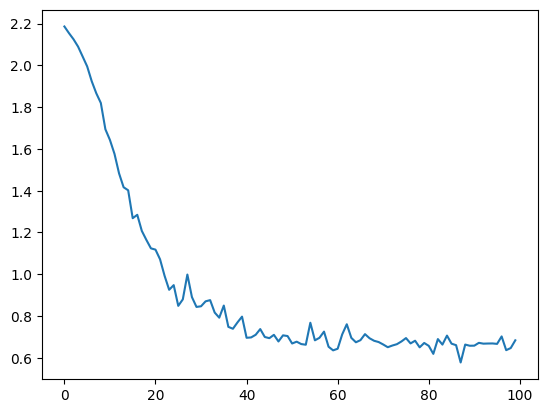

In [17]:
plt.figure()
plt.plot(all_losses)

/tmp/ipykernel_9086/1655712744.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + intents, rotation=90)
/tmp/ipykernel_9086/1655712744.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + intents)


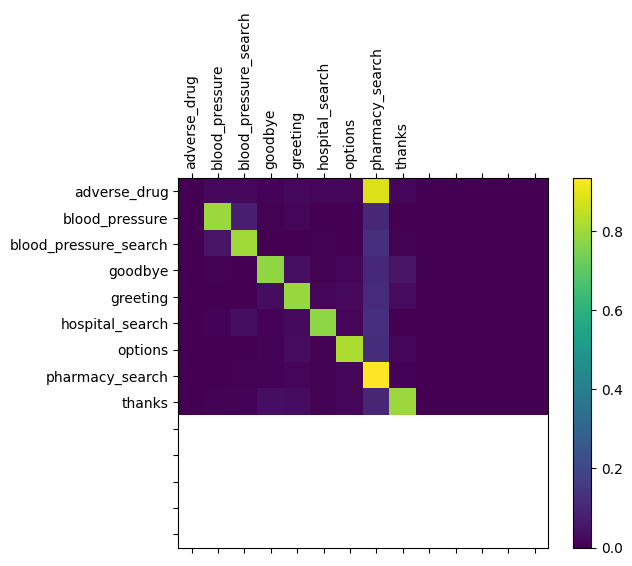

In [18]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    output, hidden = rnn(line_tensor, hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = intents.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + intents, rotation=90)
ax.set_yticklabels([''] + intents)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [19]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(torch.from_numpy(bag_of_words(input_line, words, lemmatizer)).view(1, -1))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, intents[category_index]))
            predictions.append([value, intents[category_index]])

predict('Hey there!')
predict('Thanks for that!')
predict('Find me a hospital')


> Hey there!
(-0.19) greeting
(-3.82) pharmacy_search
(-3.82) options

> Thanks for that!
(-2.20) pharmacy_search
(-2.20) hospital_search
(-2.20) options

> Find me a hospital
(-0.61) hospital_search
(-1.15) pharmacy_search
(-3.68) options


In [20]:
# Save the model
torch.save(rnn, '../clean_data/models/intents_classifier.pth')